# Assignment 2: s3944721 and s3941488

Authors: Issac Zerihun and Samuel Chan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'UCI_data.csv'
df = pd.read_csv(file, on_bad_lines='skip')

In [3]:
df.dtypes

date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.set_index('date', inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, shuffle=False)

In [6]:
df.head()

T1       RH_1    T2       RH_2     T3       RH_3  \
date                                                                       
2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

                            T4       RH_4         T5   RH_5  ...   RH_9  \
date                                                         ...          
2016-01-11 17:00:00  19.000000  45.566667  17.166667  55.20  ...  45.53   
2016-01-11 17:10:00  19.000000  45.992500  17.166667  55.20  ...  45.56   
2016-01-11 17:20:00  18.926667  45.890000  17.166667  55.09  ...  45.50   
2016-01-11 17:30:00  18.890000  45.723333  17.166667  55.09  ...  45.40   
2016-01-11 17:40:00  18.890000  45.530000  17.200000  55.09  ...  45.40   

                        T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
date                                                                        
2016-01-11 17:00:00  6.600000        733.5    92.0   7.000000   63.000000   
2016-01-11 17:10:00  6.483333        733.6    92.0   6.666667   59.166667   
2016-01-11 17:20:00  6.366667        733.7    92.0   6.333333   55.333333   
2016-01-11 17:30:00  6.250000        733.8    92.0   6.000000   51.500000   
2016-01-11 17:40:00  6.133333        733.9    92.0   5.666667   47.666667   

                     Tdewpoint        rv1        rv2  TARGET_energy  
date                                                                 
2016-01-11 17:00:00        5.3  13.275433  13.275433             90  
2016-01-11 17:10:00        5.2  18.606195  18.606195             90  
2016-01-11 17:20:00        5.1  28.642668  28.642668             80  
2016-01-11 17:30:00        5.0  45.410389  45.410389             90  
2016-01-11 17:40:00        4.9  10.084097  10.084097            100  

[5 rows x 27 columns]

#### Boxplots

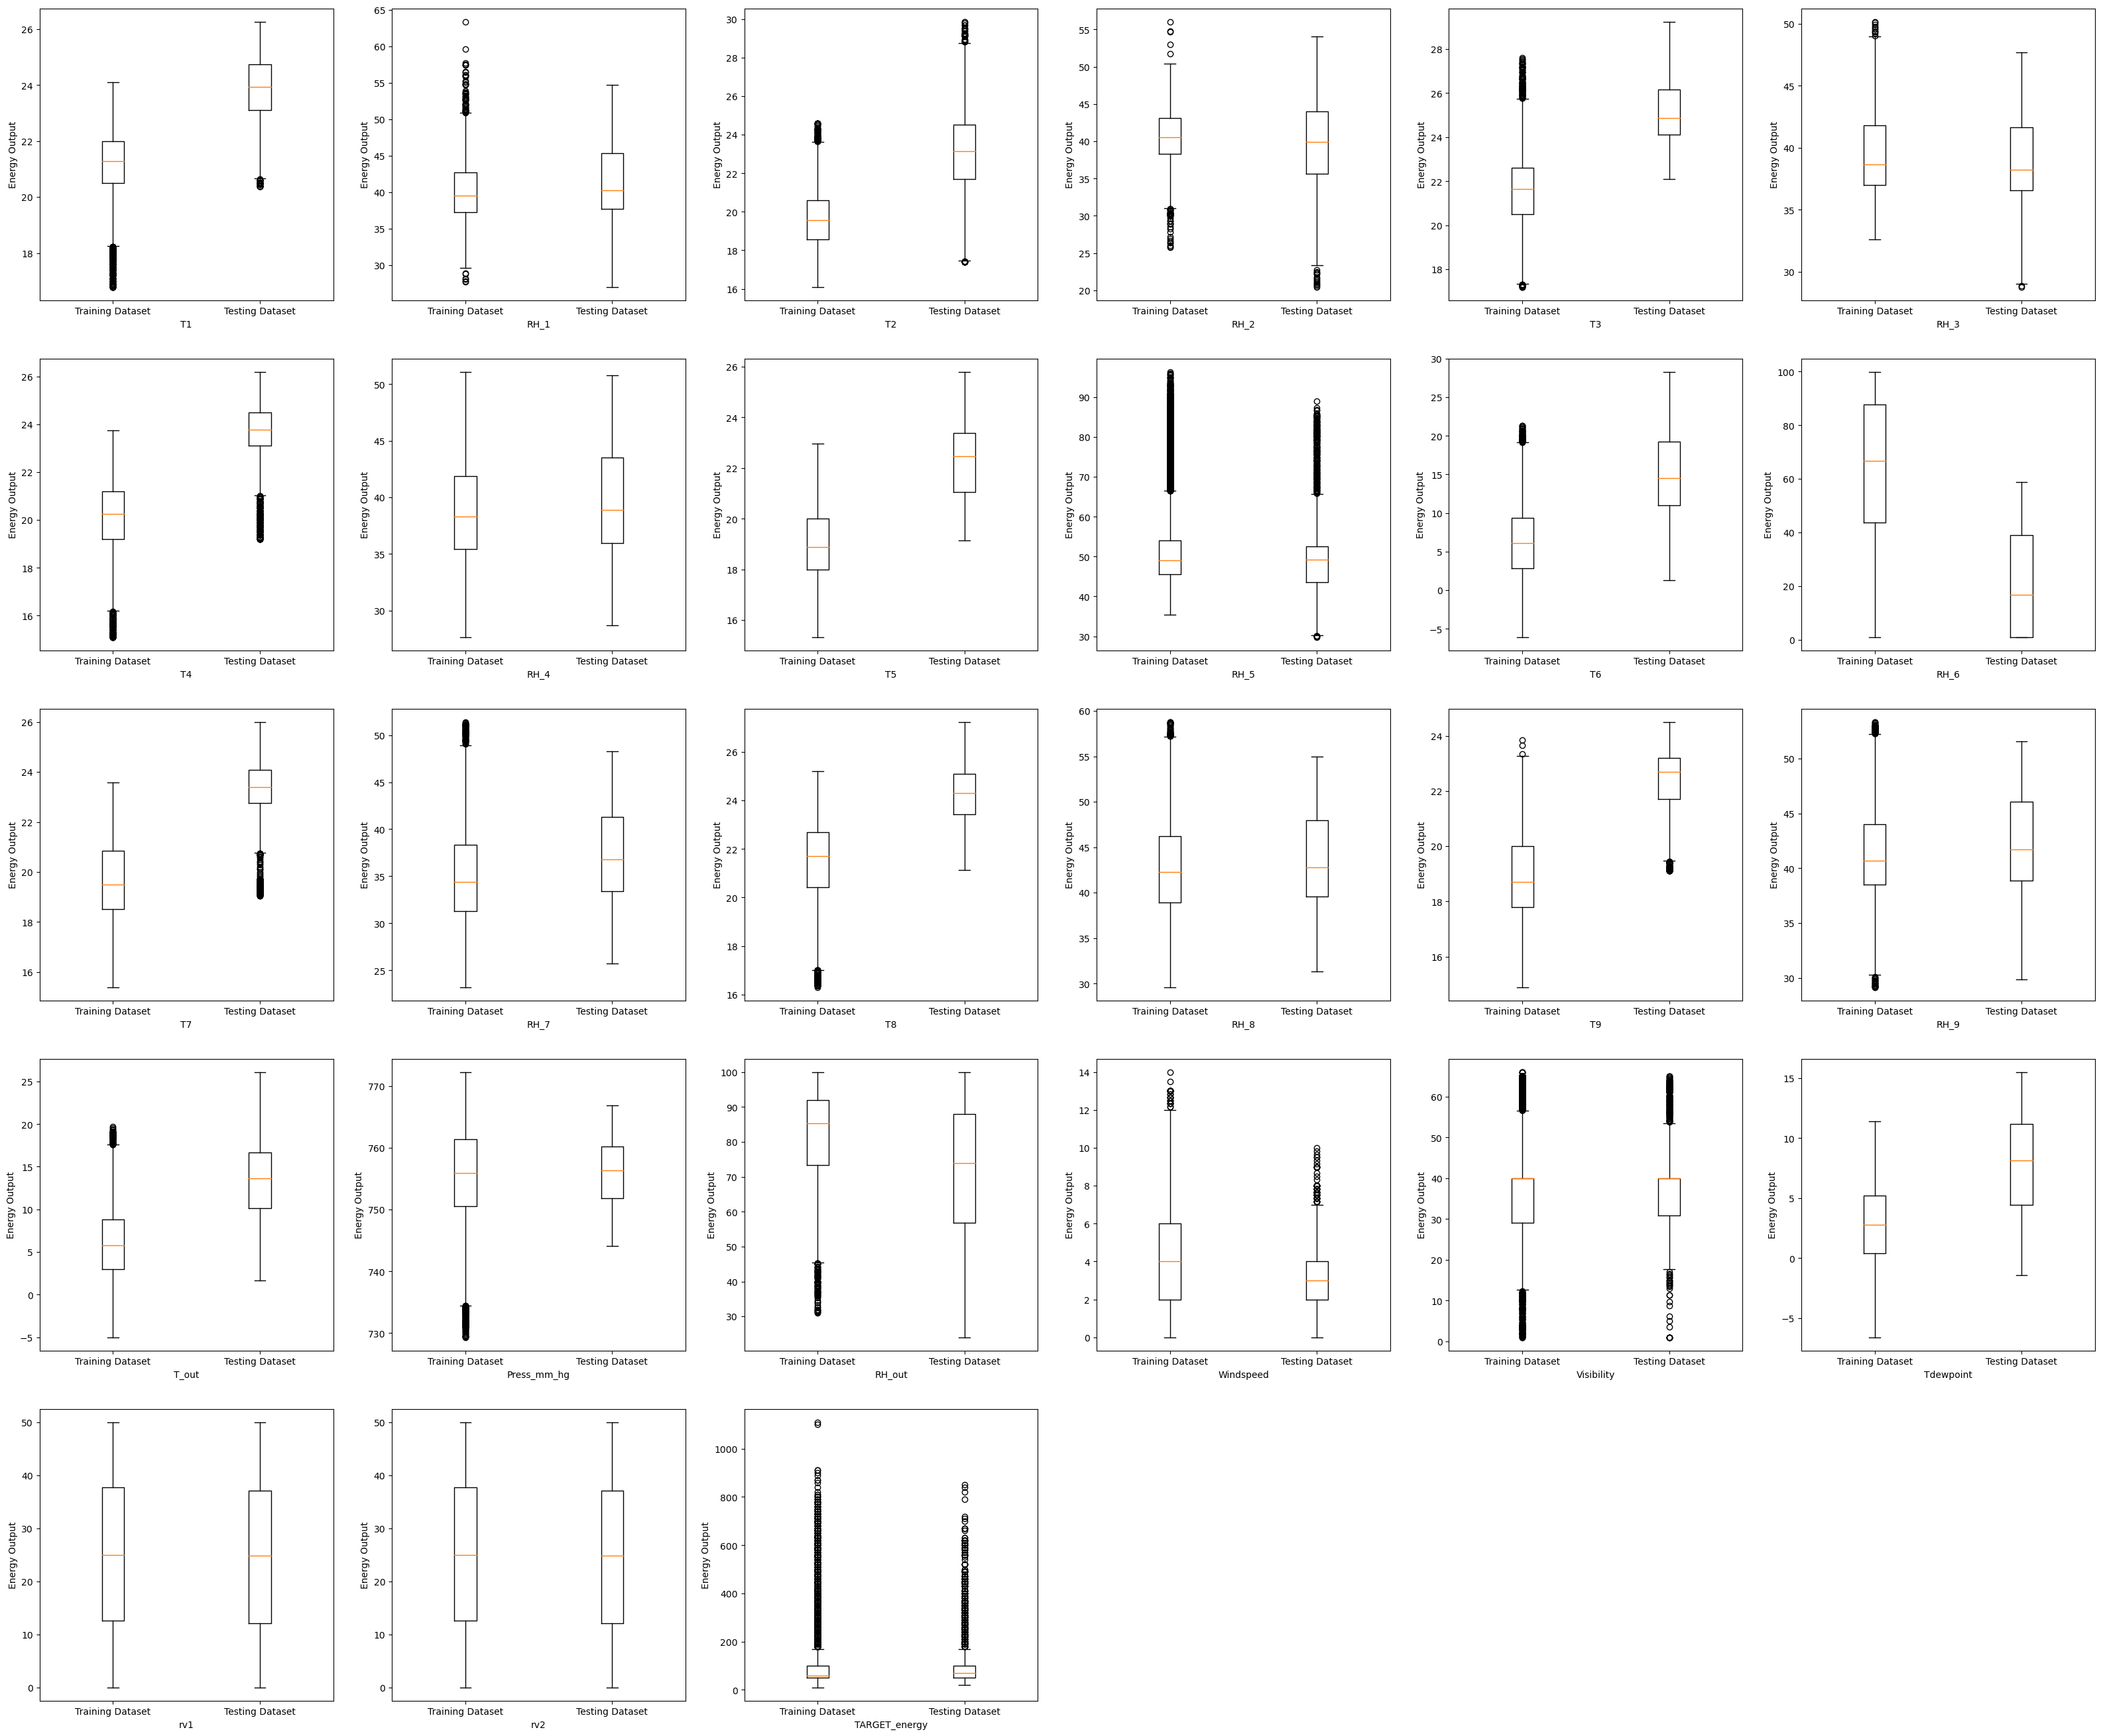

In [7]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(training_data[col], positions = [0])
    plt.boxplot(testing_data[col], positions = [1])
    plt.xticks([0,1],['Training Dataset', 'Testing Dataset'])
    plt.xlabel(col)
    plt.ylabel('Energy Output')
plt.show()

#### Removal of outliers (training dataset)

In [8]:
for i, col in enumerate(df.columns):
   
    q1 = training_data[col].quantile(0.25)
    q3 = training_data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    training_data = training_data[(training_data[col] < upper_bound) & (training_data[col] > lower_bound)]

#### Removal of outliers (testing dataset)

In [9]:
for i, col in enumerate(df.columns):
   
    q1 = testing_data[col].quantile(0.25)
    q3 = testing_data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    testing_data = testing_data[(testing_data[col] < upper_bound) & (testing_data[col] > lower_bound)]

#### Checking to see if outliers have been removed.

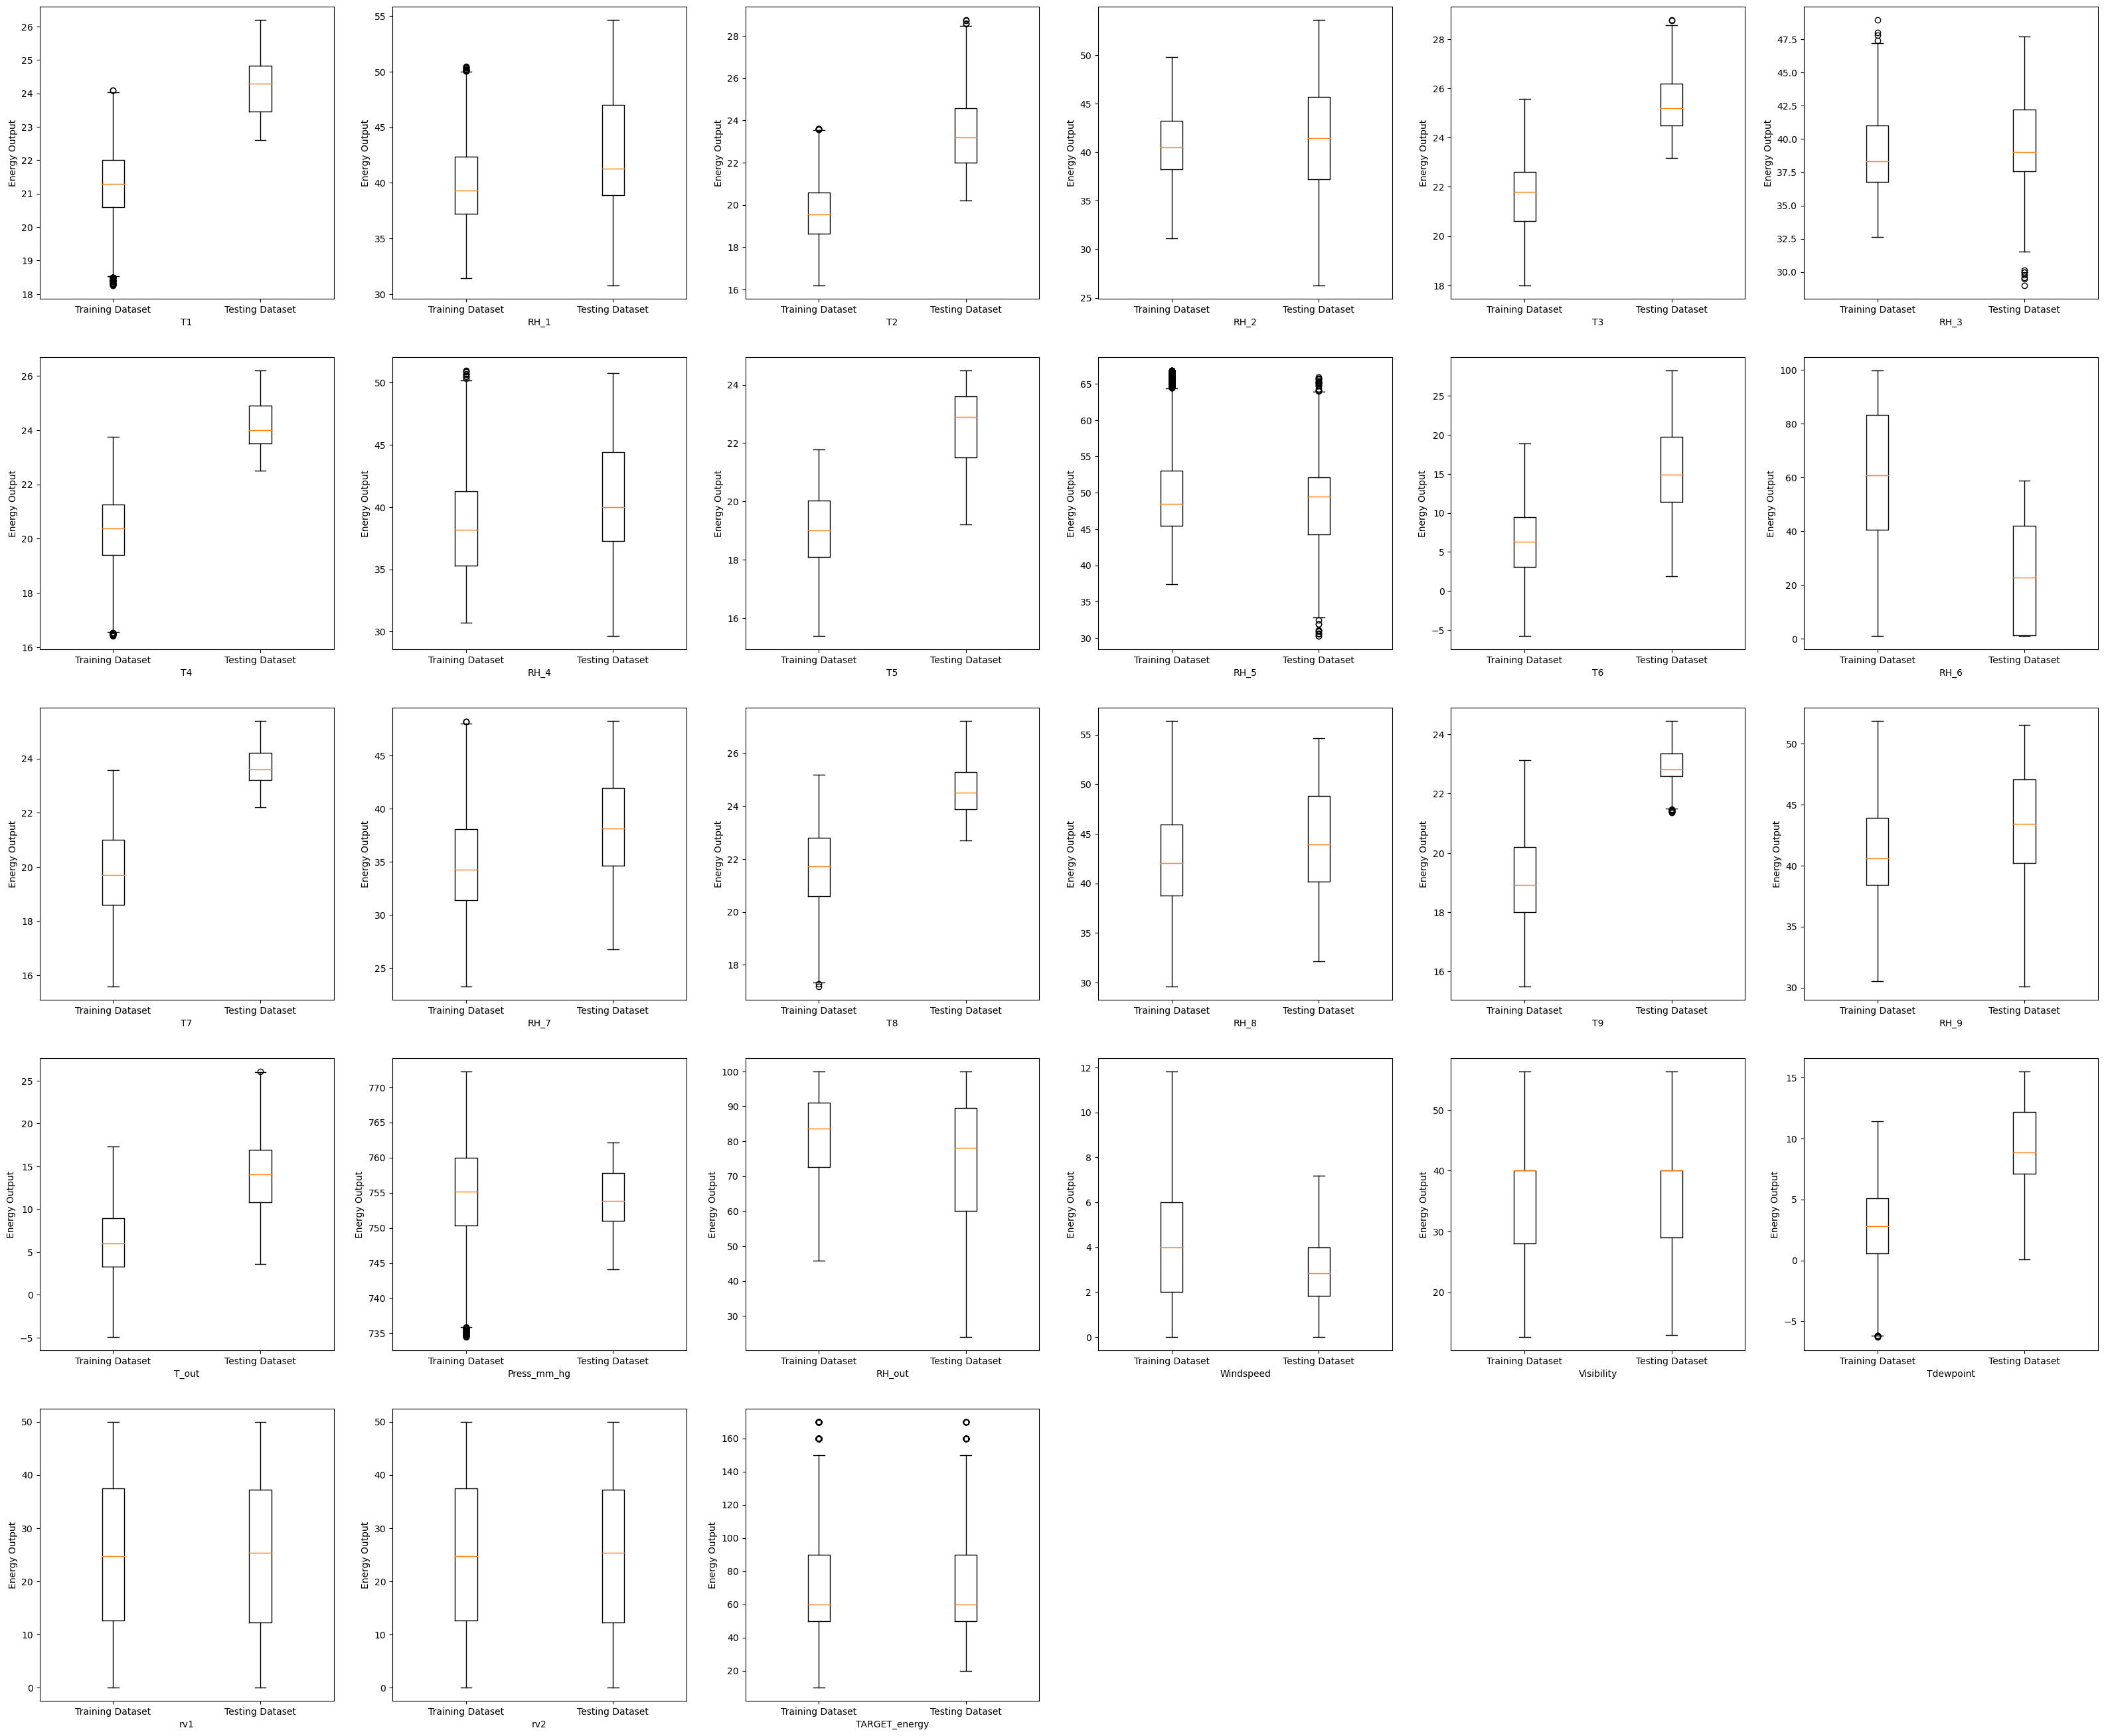

In [10]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(training_data[col], positions = [0])
    plt.boxplot(testing_data[col], positions = [1])
    plt.xticks([0,1],['Training Dataset', 'Testing Dataset'])
    plt.xlabel(col)
    plt.ylabel('Energy Output')
plt.show()

#### Checking for duplicates

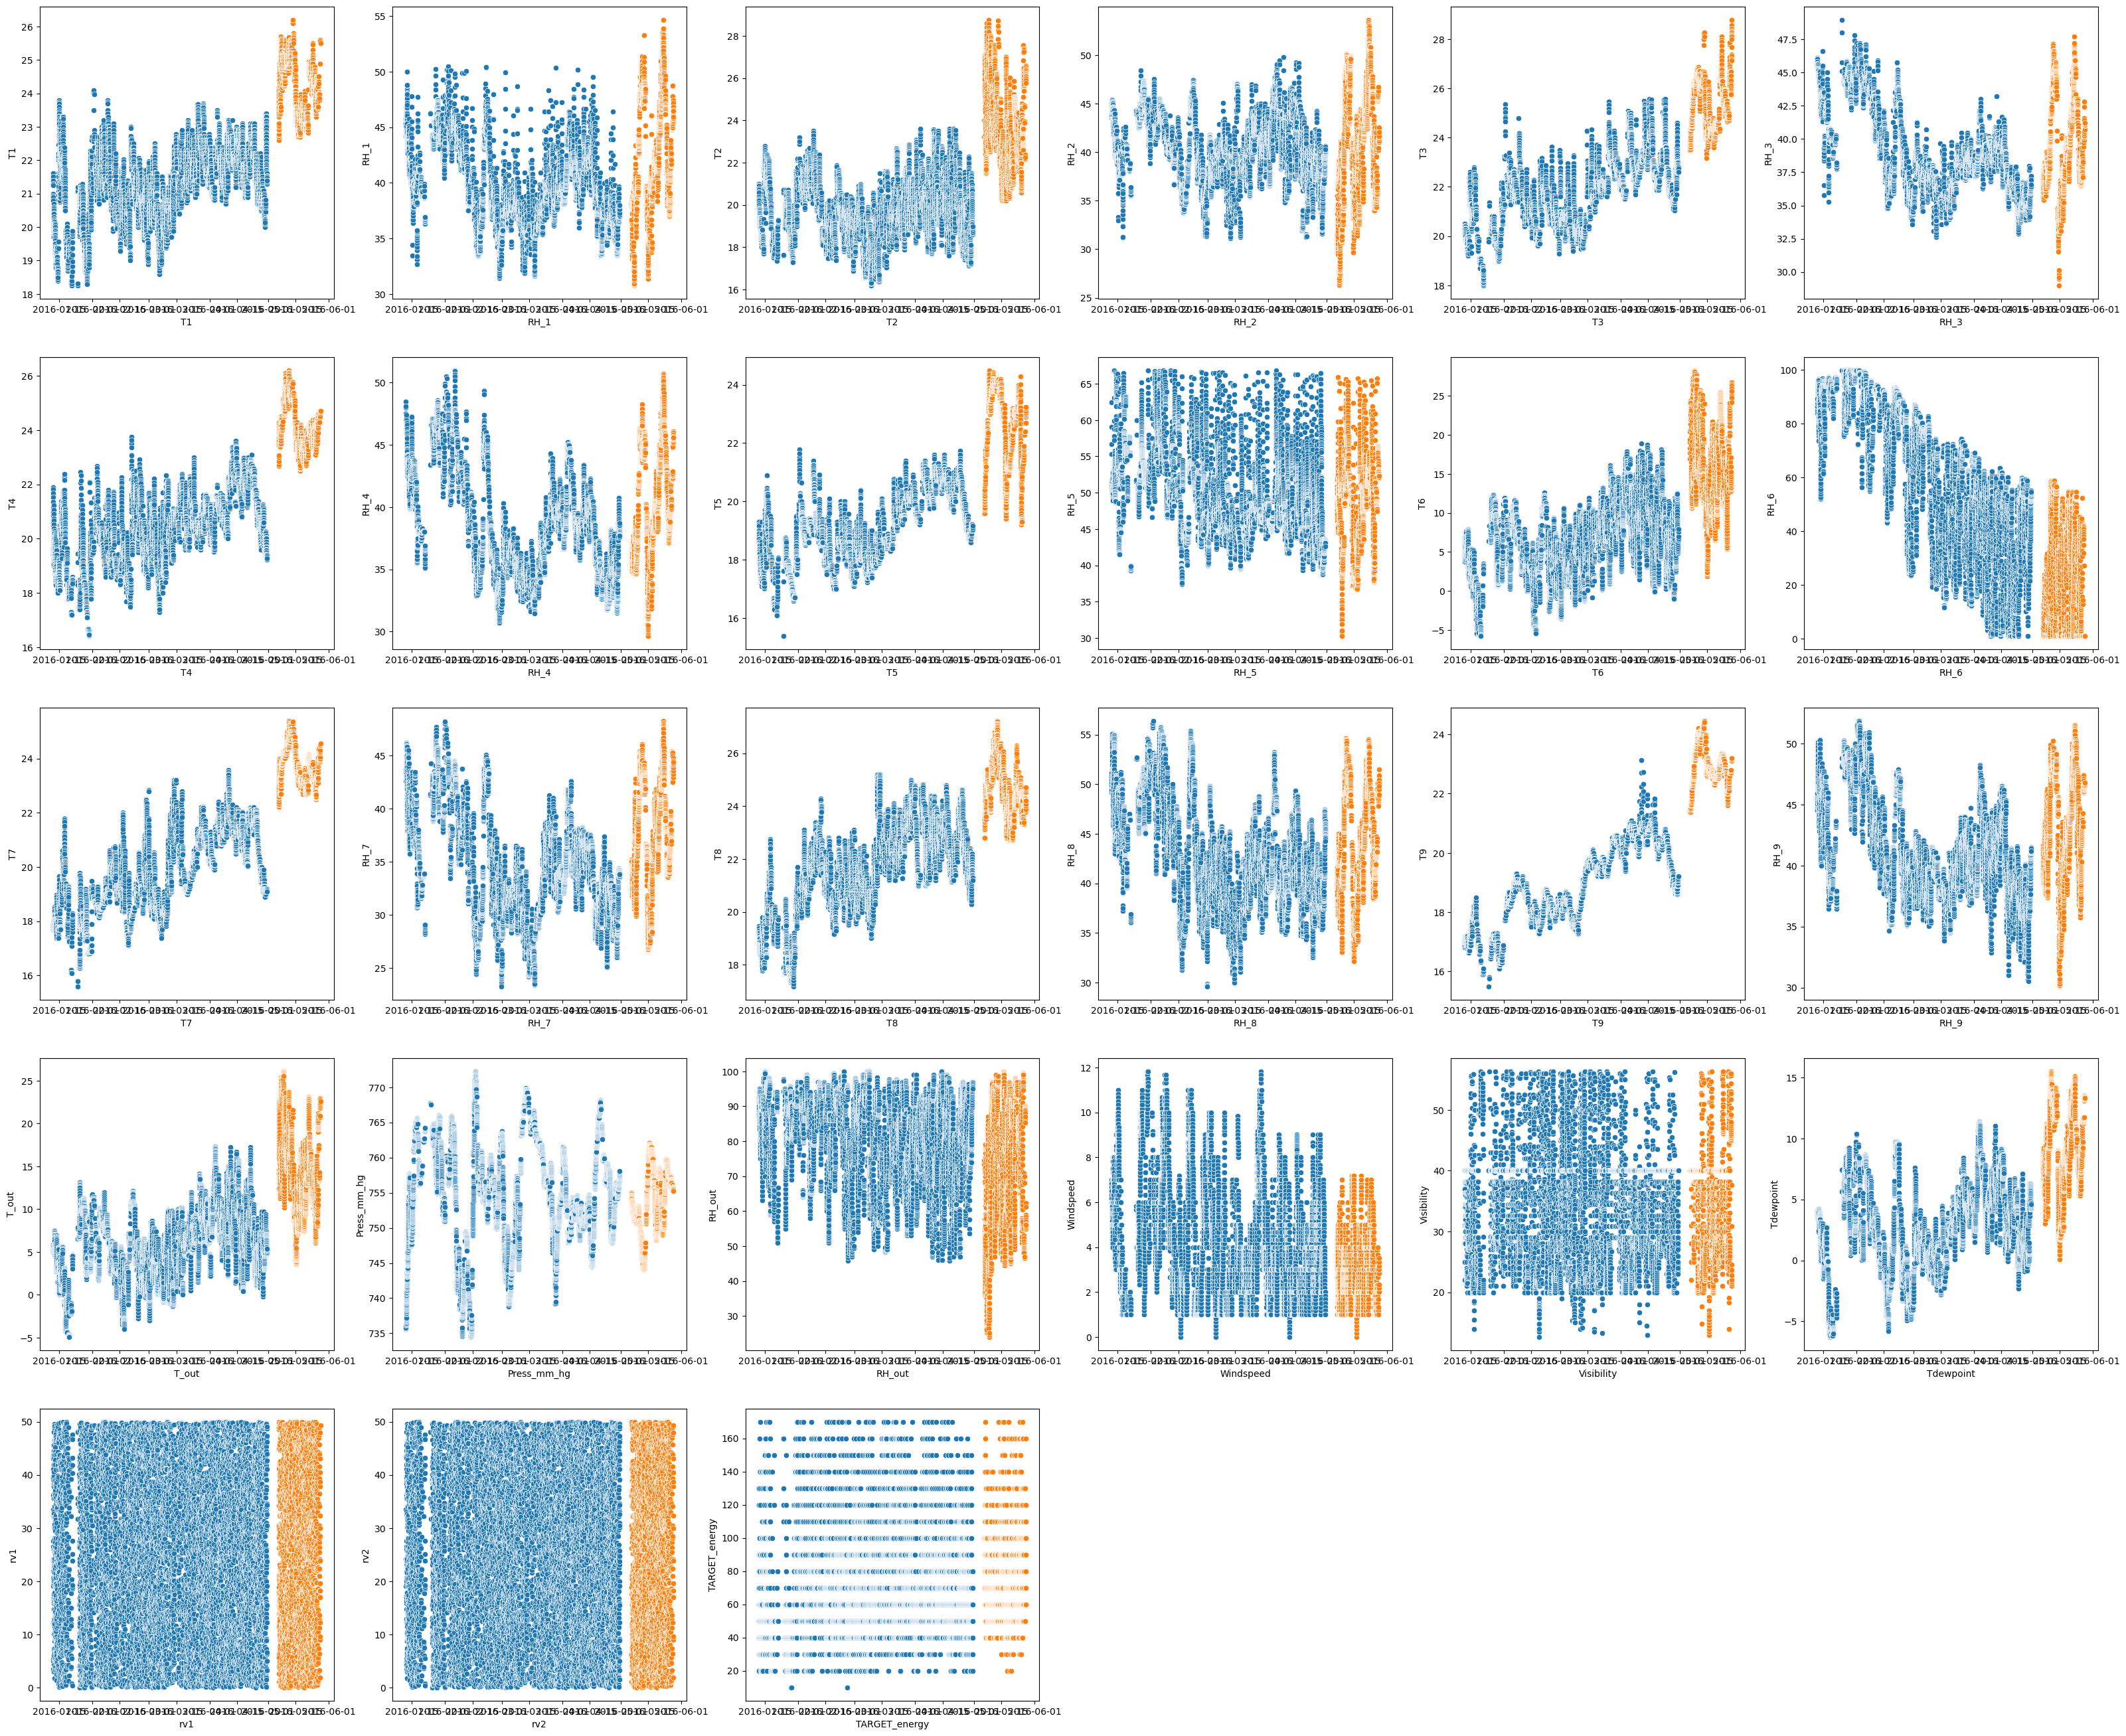

In [11]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    sns.scatterplot(data = training_data, x = training_data.index, y = training_data[col])
    sns.scatterplot(data = testing_data, x = testing_data.index, y = testing_data[col])
    plt.xlabel(col)
plt.show()

#### Feature scaling (training + testing dataset)

In [12]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

columns = df.columns[0:26]

scaler = StandardScaler()
transformer = PowerTransformer()

training_data[columns] = transformer.fit_transform(training_data[columns])
training_data[columns] = scaler.fit_transform(training_data[columns])

testing_data[columns] = transformer.transform(testing_data[columns])
testing_data[columns] = scaler.transform(testing_data[columns])


#### Histograms

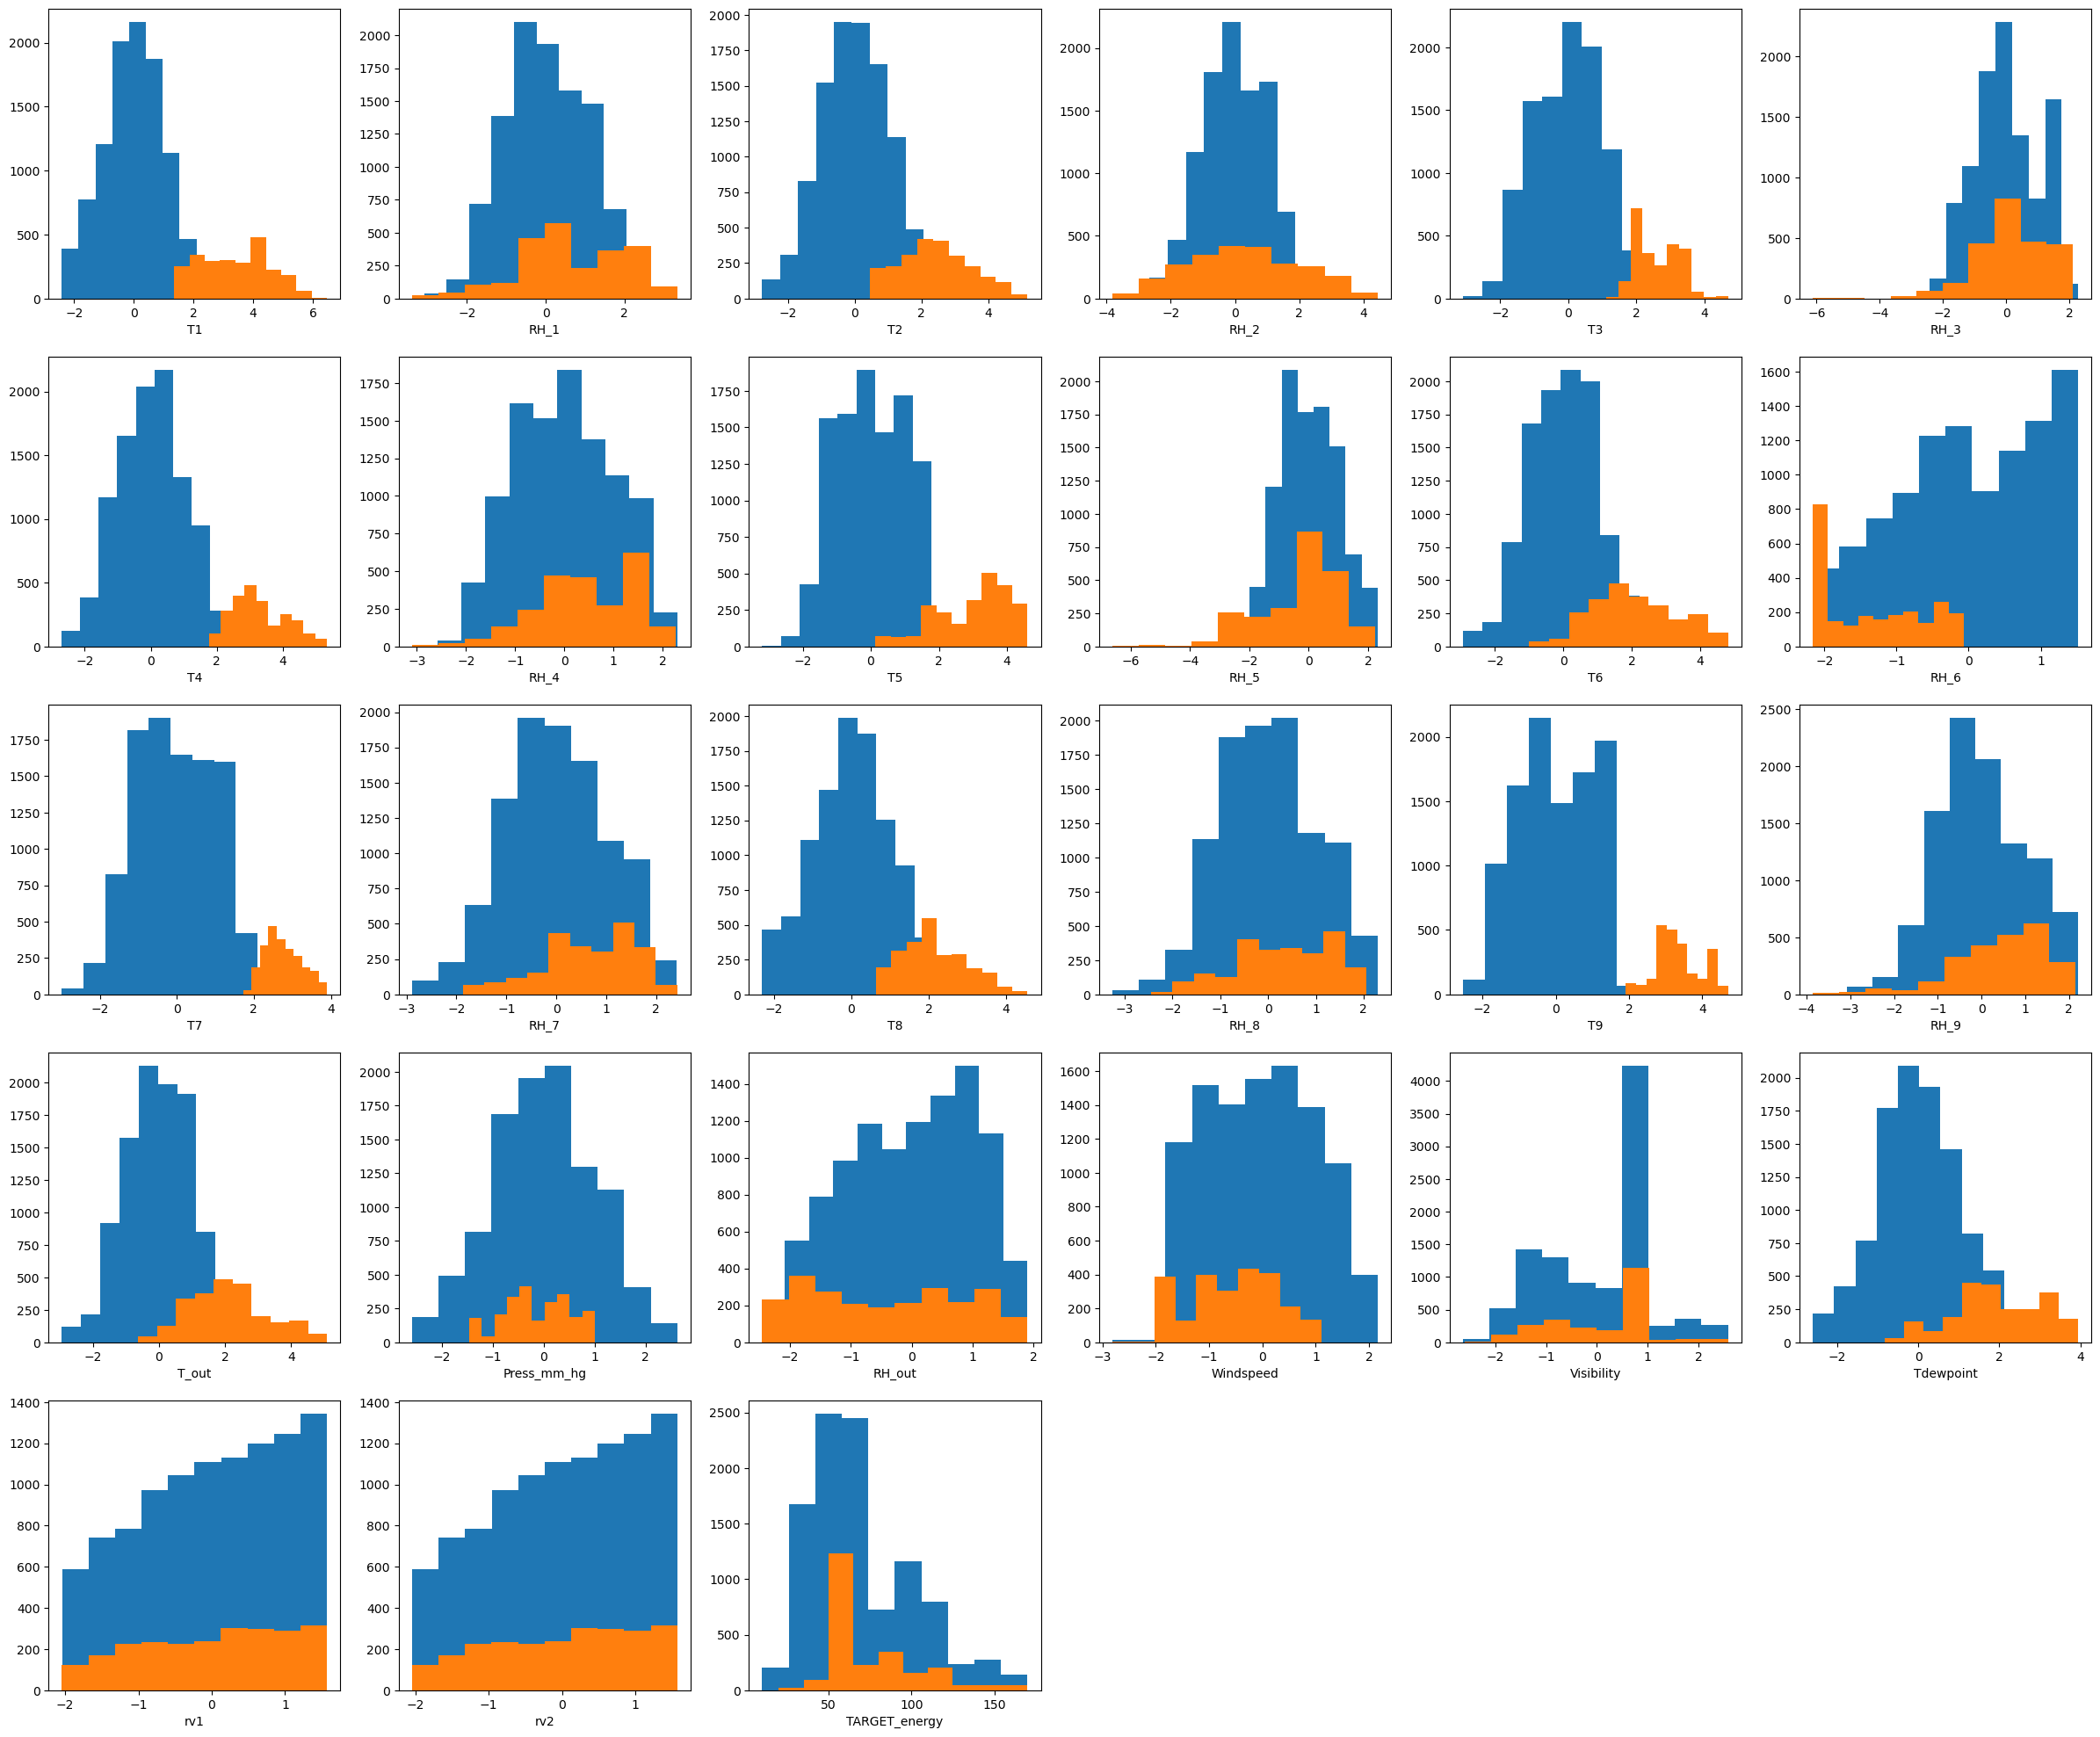

In [13]:
plt.figure(figsize=(30,30))
for i, col in enumerate(testing_data.columns):
    plt.subplot(6,6,i+1)  
    plt.hist(training_data[col])
    plt.hist(testing_data[col])
    plt.xlabel(col)
plt.show()

#### Plot of Energy Against Time

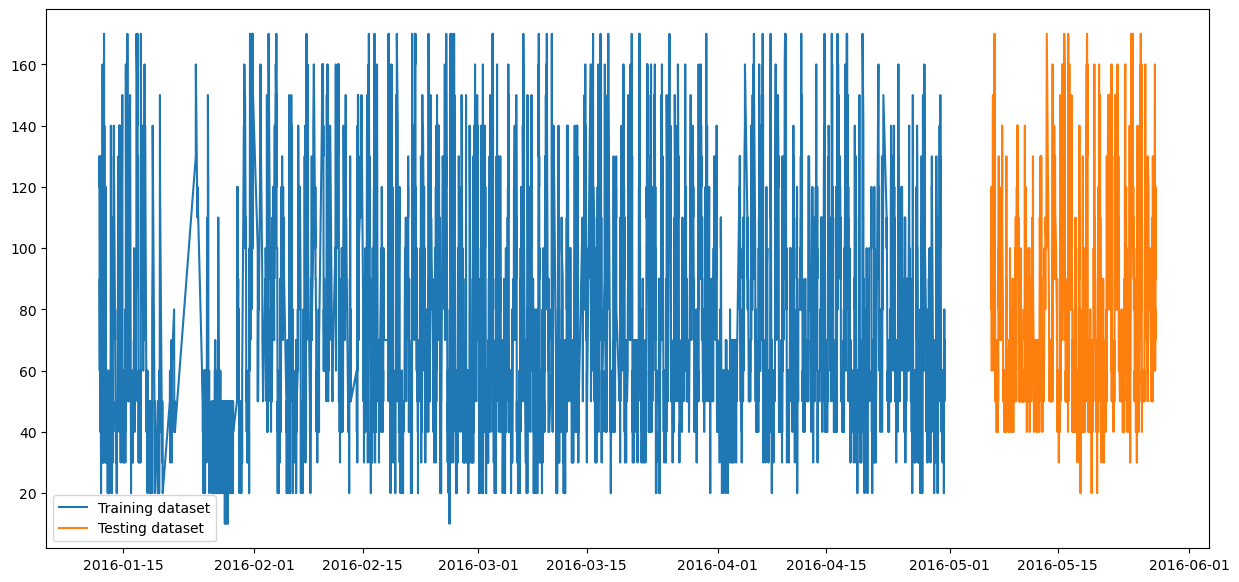

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(training_data.index,training_data['TARGET_energy'])
plt.plot(testing_data.index,testing_data['TARGET_energy'])
plt.legend(['Training dataset', 'Testing dataset'])
plt.show()

In [15]:
print(f"Number of nulls in training dataset: {training_data.isnull().sum().sum()}")
print(f"Number of nulls in testing dataset:  {testing_data.isnull().sum().sum()}")

Number of nulls in training dataset: 0
Number of nulls in testing dataset:  0


#### Removal of columns

In [16]:
training_data = training_data.drop(['RH_out','rv1','rv2','Visibility','RH_5'],axis=1)
testing_data = testing_data.drop(['RH_out','rv1','rv2','Visibility','RH_5'],axis=1)

#### Heatmap of whole dataset (display of correlation table)

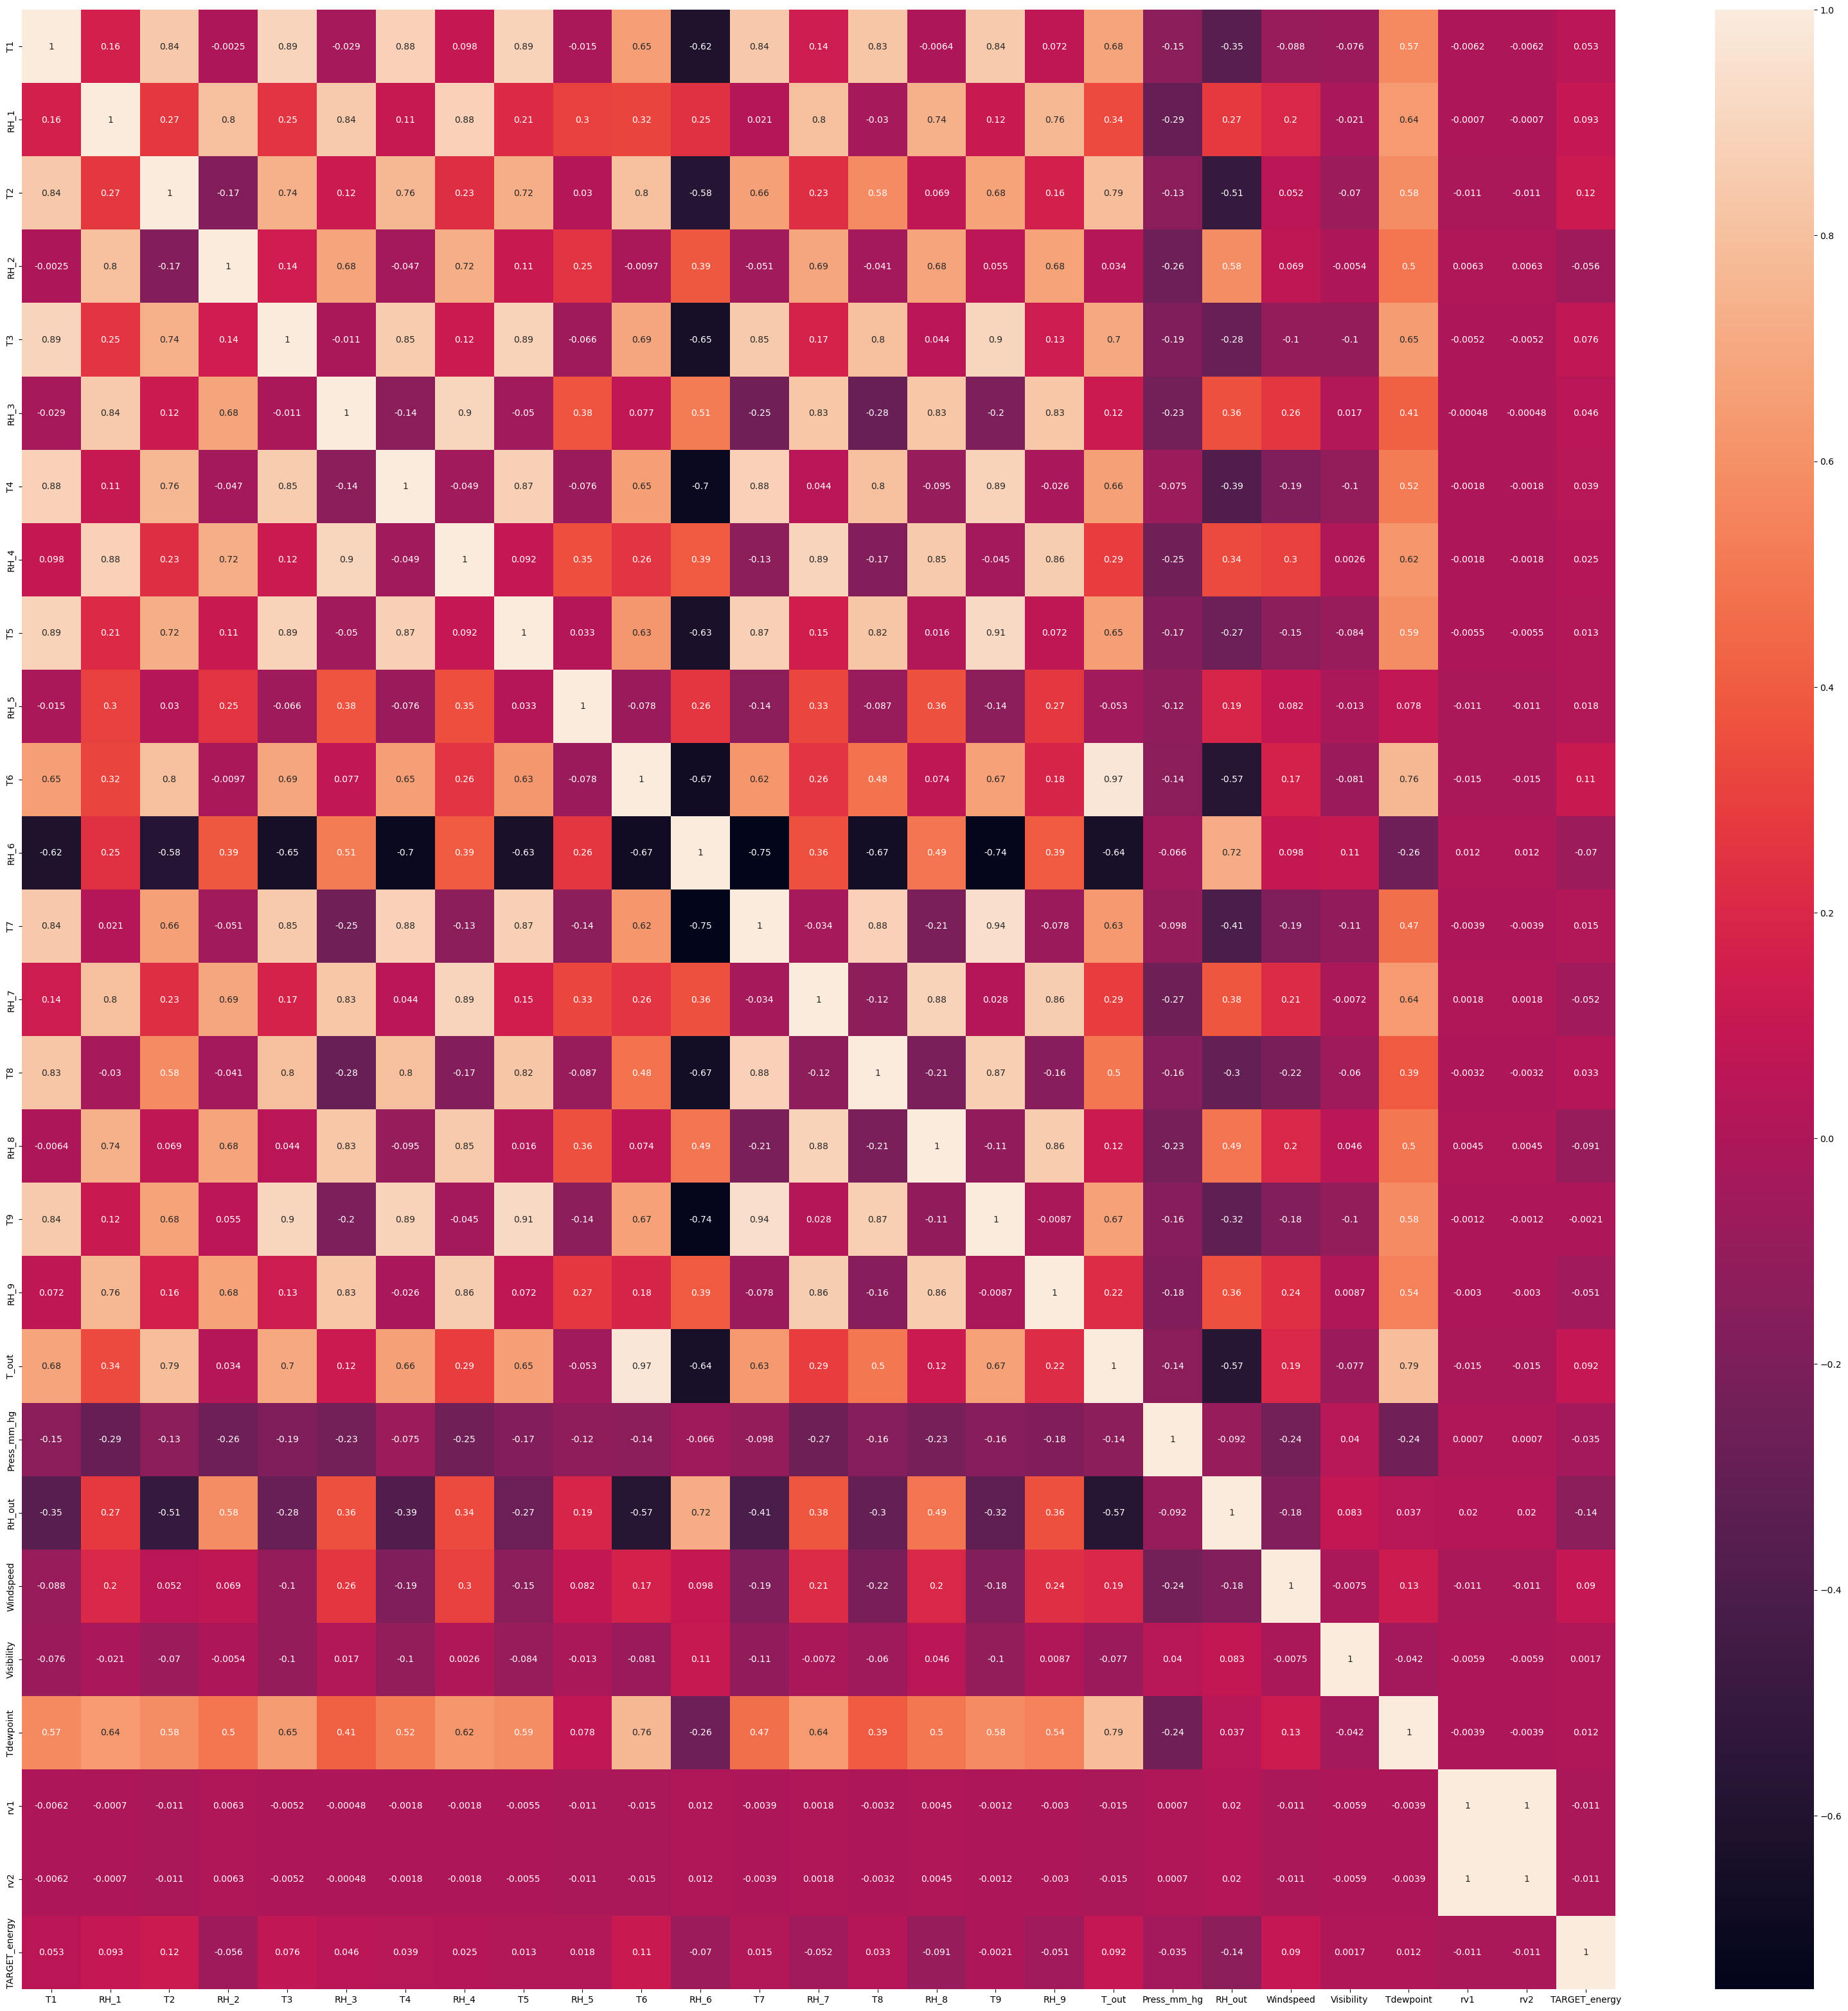

In [17]:
plt.figure(figsize=(40,40))
correlation_table = df.corr()
sns.heatmap(correlation_table,annot=True)
plt.show()

In [18]:
print(training_data.dtypes)
print(testing_data.dtypes)

T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
Windspeed        float64
Tdewpoint        float64
TARGET_energy      int64
dtype: object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out      

In [19]:
print(f"Target feature info (training set):\n{training_data['TARGET_energy'].describe()}\n") 
print(f"Target feature info (testing set):\n{testing_data['TARGET_energy'].describe()}")

Target feature info (training set):
count    10153.000000
mean        68.888998
std         30.568020
min         10.000000
25%         50.000000
50%         60.000000
75%         90.000000
max        170.000000
Name: TARGET_energy, dtype: float64

Target feature info (testing set):
count    2412.000000
mean       72.674129
std        27.314867
min        20.000000
25%        50.000000
50%        60.000000
75%        90.000000
max       170.000000
Name: TARGET_energy, dtype: float64


# Part 2: Non Neural Algorithm

## Modelling using XGBoost

In [20]:
training_set, validation_set = train_test_split(training_data, test_size=0.2, shuffle=False)

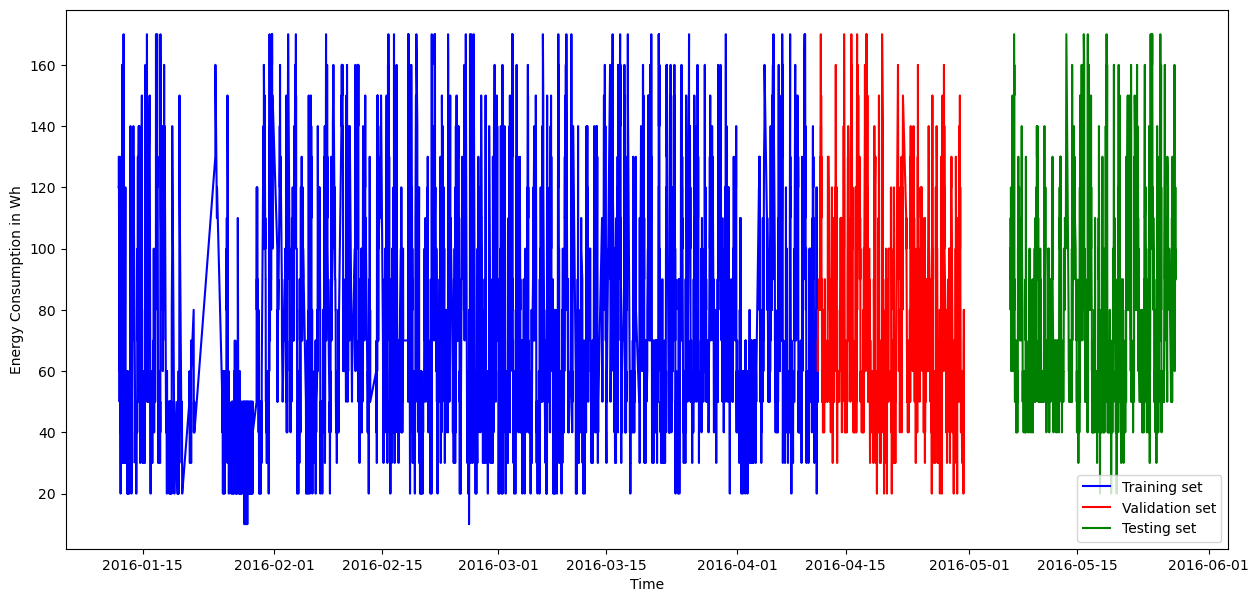

In [21]:
plt.figure(figsize=(15, 7))

plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set', color='blue')
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(testing_data.index,testing_data['TARGET_energy'], color='green')
plt.xlabel('Time')
plt.ylabel("Energy Consumption in Wh")
plt.legend(["Training set","Validation set","Testing set"])
plt.show()

In [22]:
! pip install xgboost
import xgboost as xgb

In [23]:
X_train, y_train = training_set.drop(columns=['TARGET_energy']), training_set['TARGET_energy']
X_test, y_test = validation_set.drop(columns=['TARGET_energy']), validation_set['TARGET_energy']

In [24]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
training_predictions = model.predict(X_train)
testing_predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
import math

mse_training = mean_squared_error(training_predictions, y_train)
rmse_training = math.sqrt(mse_training)

mse_testing = mean_squared_error(testing_predictions,y_test)
rmse_testing = math.sqrt(mse_testing)

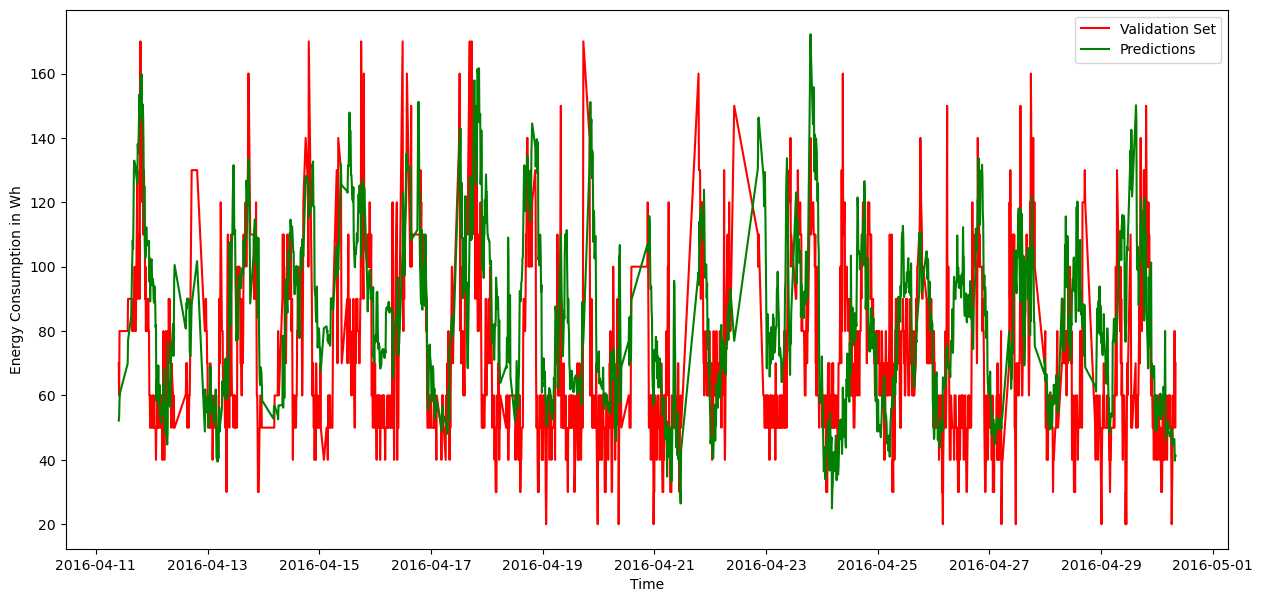

In [27]:
plt.figure(figsize=(15, 7))
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(validation_set.index, testing_predictions, color='green', label='Predictions')
plt.xlabel('Time')
plt.ylabel("Energy Consumption in Wh")
plt.legend()
plt.show()

In [28]:
print(f"RMSE for training (neural): {rmse_training}")
print(f"MSE for training (neural): {mse_training}\n")

print(f"RMSE for testing (neural): {rmse_testing}")
print(f"MSE for testing (neural): {mse_testing}")

RMSE for training (neural): 9.12919389451024
MSE for training (neural): 83.34218116356307

RMSE for testing (neural): 30.260407700279227
MSE for testing (neural): 915.6922741871183


### Part 2B: Refinements

# Part 3: Neural Supervised Algorithm

In [29]:
import tensorflow as tf
training_set.shape

(8122, 22)

#### Designed Neural Model

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(21,)),
    tf.keras.layers.Dense(1)
])

#### Neural Network Information

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


#### Compiling

In [32]:
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

#### Fitting onto the data

In [33]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
138/254 [===============>..............] - ETA: 0s - loss: 5447.8799 - root_mean_squared_error: 73.8098 

2024-05-03 13:11:57.204937: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


254/254 [==============================] - 0s 351us/step - loss: 5152.0513 - root_mean_squared_error: 71.7778
Epoch 2/50
254/254 [==============================] - 0s 325us/step - loss: 3196.1829 - root_mean_squared_error: 56.5348
Epoch 3/50
254/254 [==============================] - 0s 314us/step - loss: 1456.9042 - root_mean_squared_error: 38.1694
Epoch 4/50
254/254 [==============================] - 0s 314us/step - loss: 836.8535 - root_mean_squared_error: 28.9284
Epoch 5/50
254/254 [==============================] - 0s 317us/step - loss: 705.8511 - root_mean_squared_error: 26.5679
Epoch 6/50
254/254 [==============================] - 0s 314us/step - loss: 676.5145 - root_mean_squared_error: 26.0099
Epoch 7/50
254/254 [==============================] - 0s 308us/step - loss: 666.0858 - root_mean_squared_error: 25.8086
Epoch 8/50
254/254 [==============================] - 0s 314us/step - loss: 662.6197 - root_mean_squared_error: 25.7414
Epoch 9/50
254/254 [============================

#### Predictions made

In [34]:
training_predictions = model.predict(X_train)
testing_predictions = model.predict(X_test)

64/64 [==============================] - 0s 234us/step


In [35]:
mse_training = mean_squared_error(training_predictions, y_train)
rmse_training = math.sqrt(mse_training)

mse_testing = mean_squared_error(testing_predictions,y_test)
rmse_testing = math.sqrt(mse_testing)

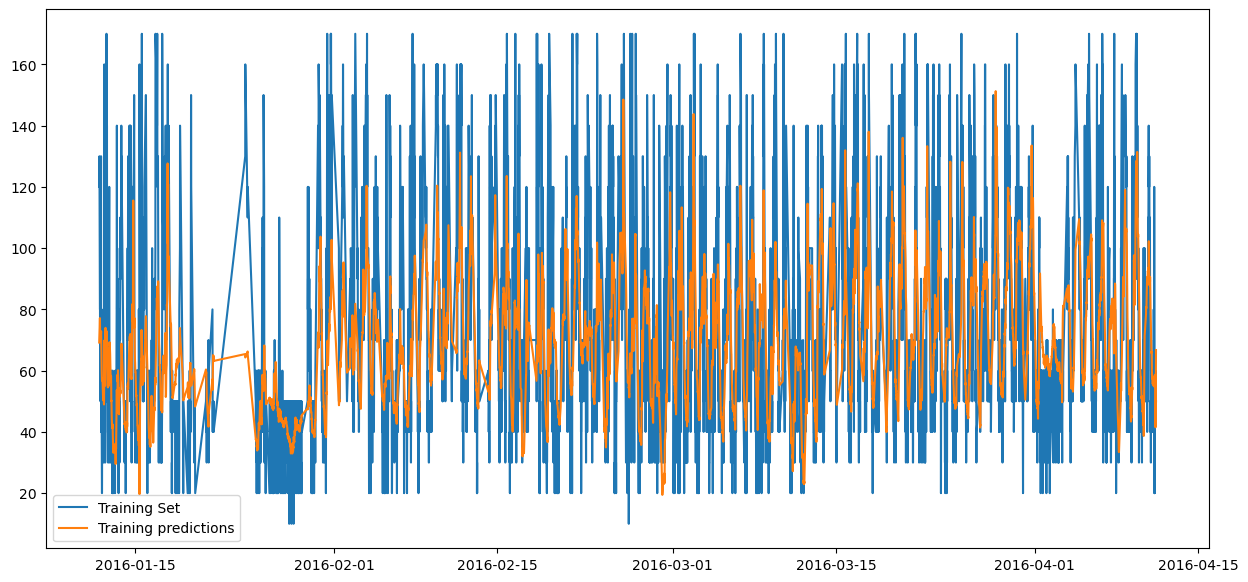

In [36]:
plt.figure(figsize=(15, 7))
plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set',)
plt.plot(training_set.index, training_predictions, label='Training predictions')
plt.legend()

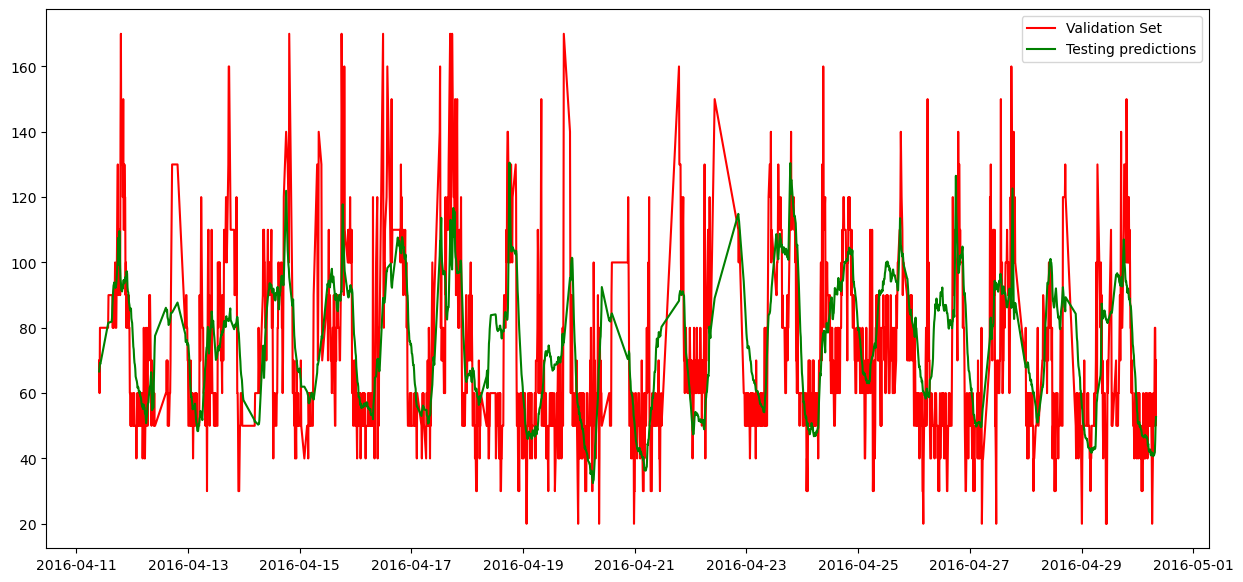

In [37]:
plt.figure(figsize=(15, 7))
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color = 'red')
plt.plot(validation_set.index, testing_predictions, label='Testing predictions', color = 'green')
plt.legend()
plt.show()

In [38]:
print(f"RMSE for training (neural): {rmse_training}")
print(f"MSE for training (neural): {mse_training}\n")

print(f"RMSE for testing (neural): {rmse_testing}")
print(f"MSE for testing (neural): {mse_testing}")

RMSE for training (neural): 25.55405184381359
MSE for training (neural): 653.0095656363127

RMSE for testing (neural): 22.67036468793479
MSE for testing (neural): 513.9454350839607
